In [11]:
# %matplotlib inline
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import os;
from health.utils import  load_training_data ,slugify

%reload_ext autoreload
%autoreload 2


TARGET='Depression'

df = load_training_data('v1')
print("total rows",len(df)) 
# print(df['Sleep Duration'].unique())

column_names = df.keys().to_list()
column_names.remove('id')
 


[autoreload of health.utils failed: Traceback (most recent call last):
  File "/Users/ceegees/workspace/iisc-learning/.venv/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/ceegees/workspace/iisc-learning/.venv/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 991, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1129, in get_code
  File "<frozen importlib._bootstrap_external>", line 1059, in source_to_code
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File 

total rows 125000


In [12]:

# Print the count of each distinct value in each column



for column in column_names:
    
    slug = slugify(column); 
    print(f"Counts for column '{column}':")
    stats = df[column].value_counts(sort=False);
    stats.sort_index()
    print(stats)
    print("\n")
    # break

print(df.info())
print(df.describe())


Counts for column 'Gender':
Gender
Male      68848
Female    56152
Name: count, dtype: int64


Counts for column 'Age':
Age
35.0    2541
40.0    2742
39.0    2911
20.0    3120
30.0    1685
21.0    2455
41.0    2767
47.0    3754
33.0    2742
19.0    2350
34.0    2311
59.0    3350
28.0    2974
18.0    3483
23.0    2573
45.0    3129
36.0    2414
32.0    1578
24.0    3011
44.0    2872
53.0    4012
48.0    3280
58.0    2612
57.0    3926
54.0    3480
25.0    2612
38.0    4052
27.0    2296
37.0    2400
26.0    1881
46.0    3625
29.0    2782
42.0    3019
56.0    4641
55.0    2501
60.0    2239
51.0    3465
49.0    4506
52.0    2295
43.0    3453
22.0    1843
50.0    3044
31.0    2274
Name: count, dtype: int64


Counts for column 'City':
City
Visakhapatnam    4617
Surat            4110
Hyderabad        3965
Rajkot           4626
Faridabad        2888
Ahmedabad        4969
Kolkata          5022
Mumbai           4419
Bangalore        3650
Ludhiana         4650
Delhi            3178
Srinagar        

Gender for Female     has   17.71%     9950,    56152
Gender for Male       has   18.44%    12701,    68848
Generated ../reports/v1/figures/gender.png chart
Age for       18.0 has   70.42%     2453,     3483
Age for       19.0 has    62.8%     1476,     2350
Age for       20.0 has    62.3%     1944,     3120
Age for       21.0 has   67.33%     1653,     2455
Age for       22.0 has   52.14%      961,     1843
Age for       23.0 has   55.57%     1430,     2573
Age for       24.0 has   55.69%     1677,     3011
Age for       25.0 has   53.67%     1402,     2612
Age for       26.0 has   41.78%      786,     1881
Age for       27.0 has   51.65%     1186,     2296
Age for       28.0 has   52.62%     1565,     2974
Age for       29.0 has   46.08%     1282,     2782
Age for       30.0 has   32.22%      543,     1685
Age for       31.0 has   38.61%      878,     2274
Age for       32.0 has   42.45%      670,     1578
Age for       33.0 has   29.72%      815,     2742
Age for       34.0 has   19

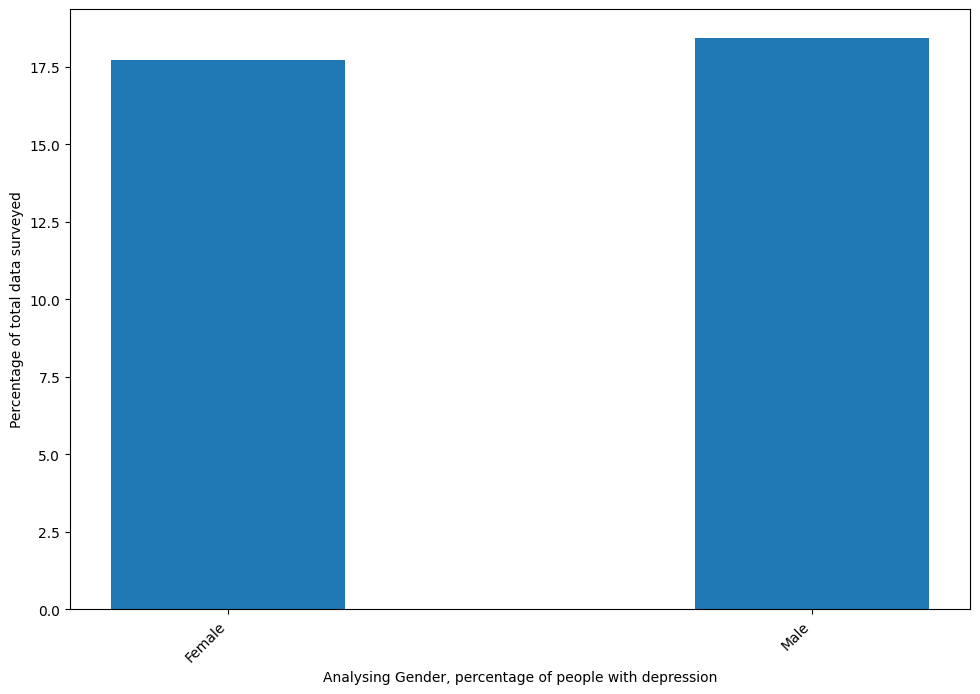

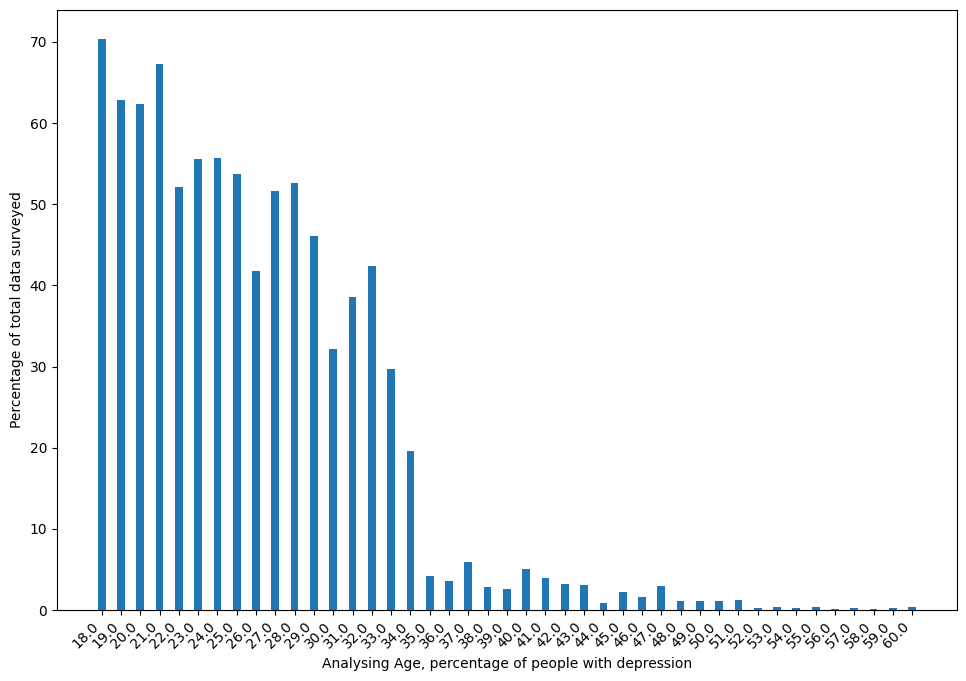

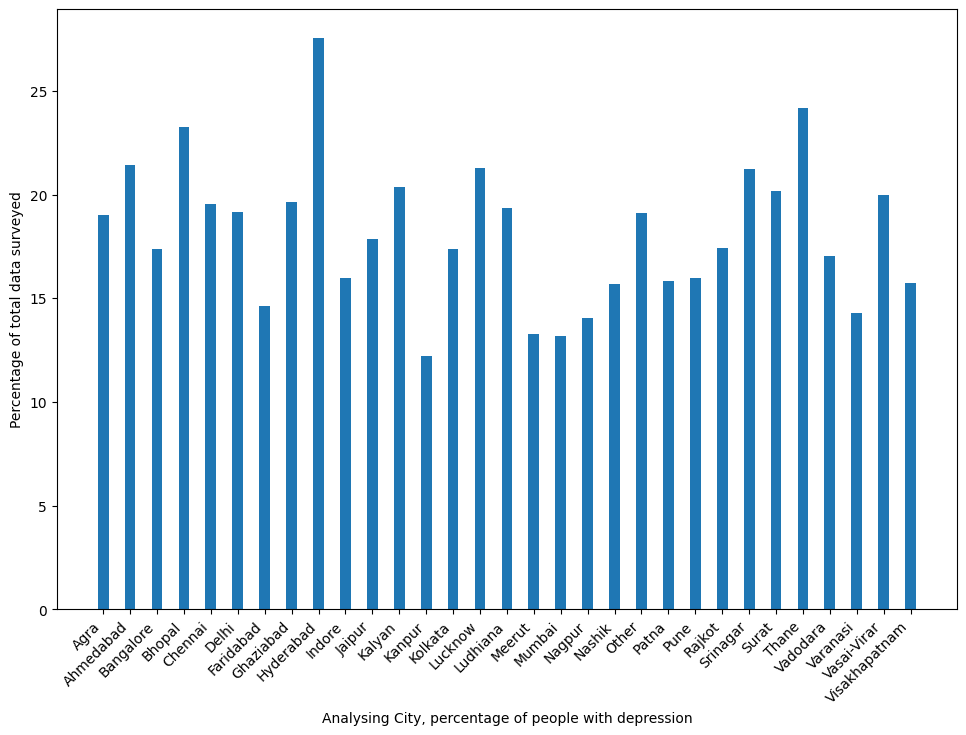

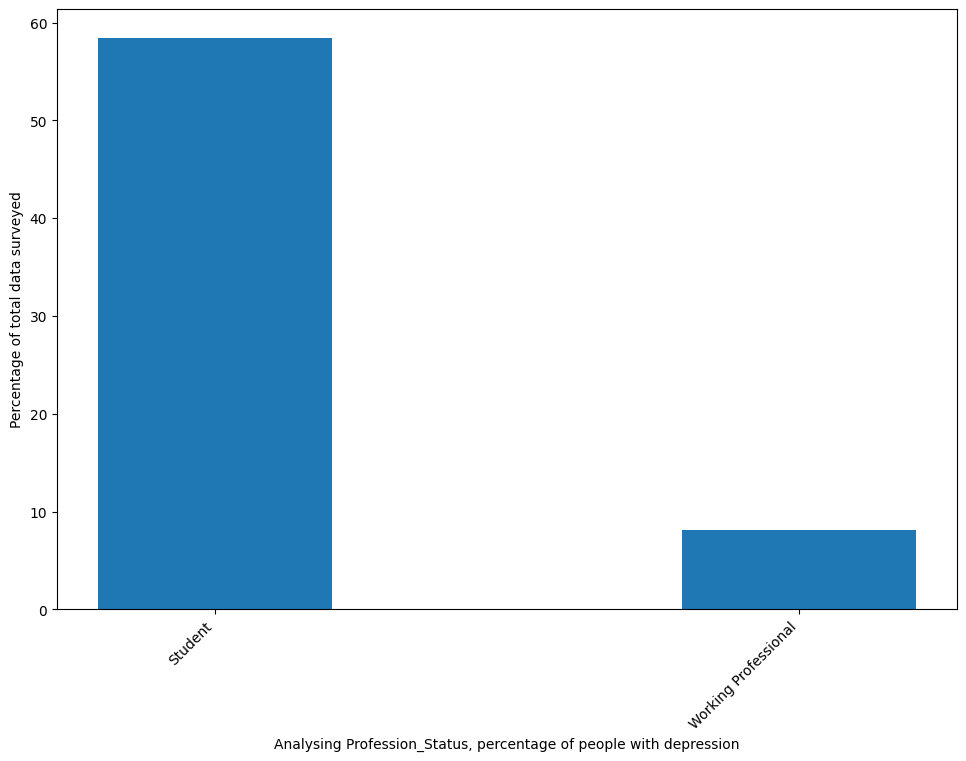

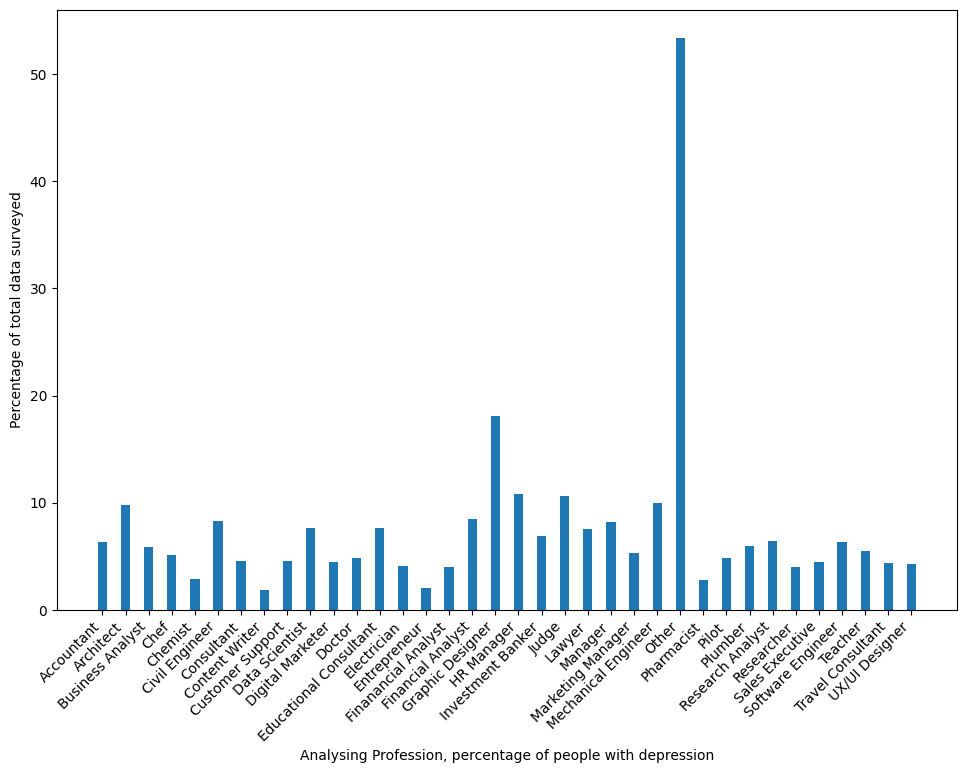

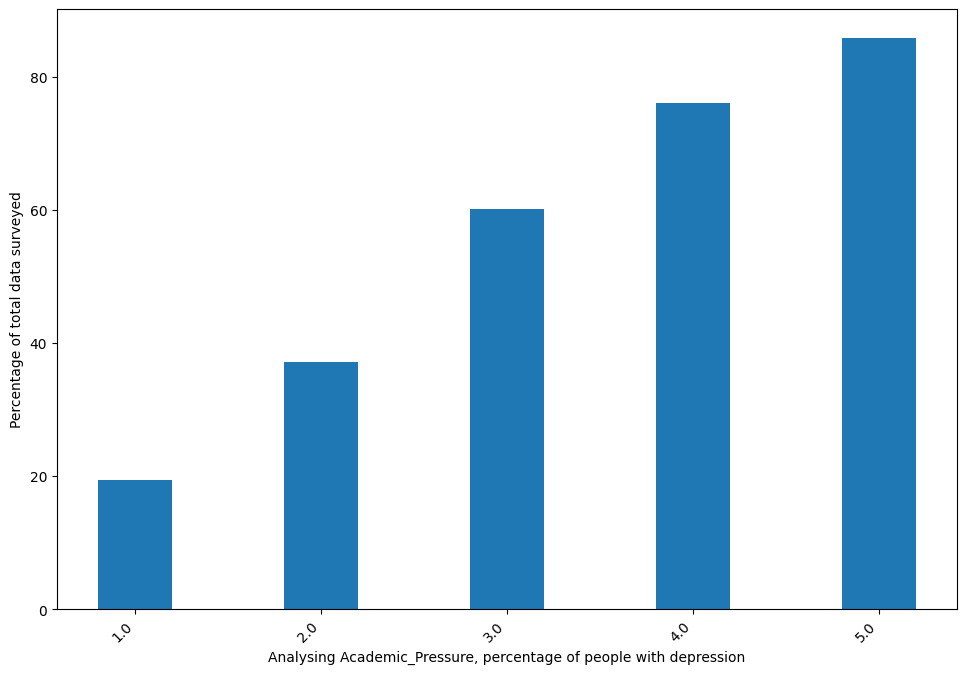

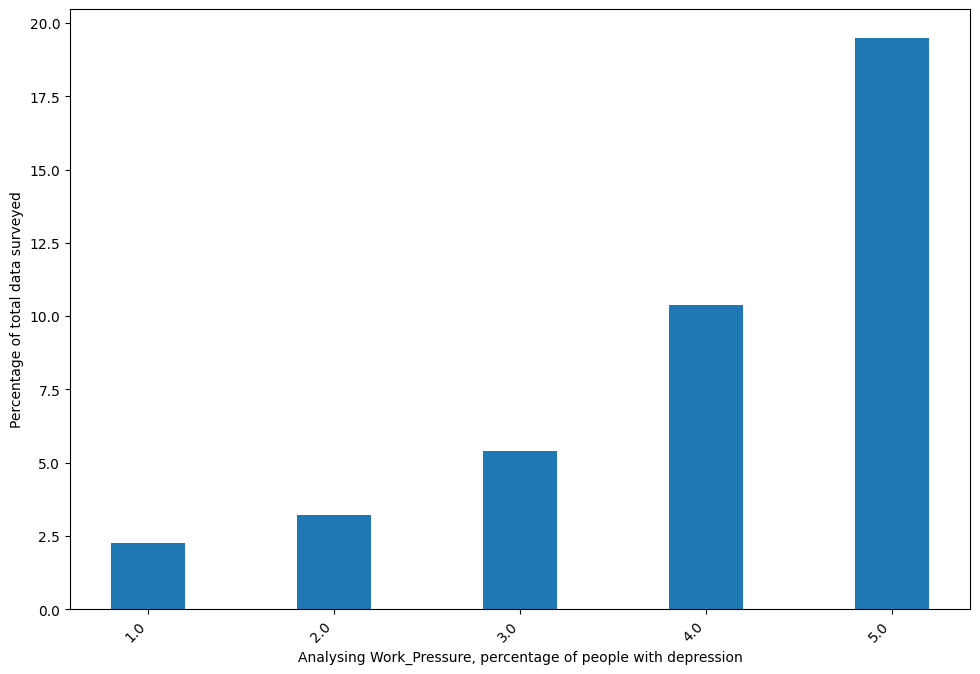

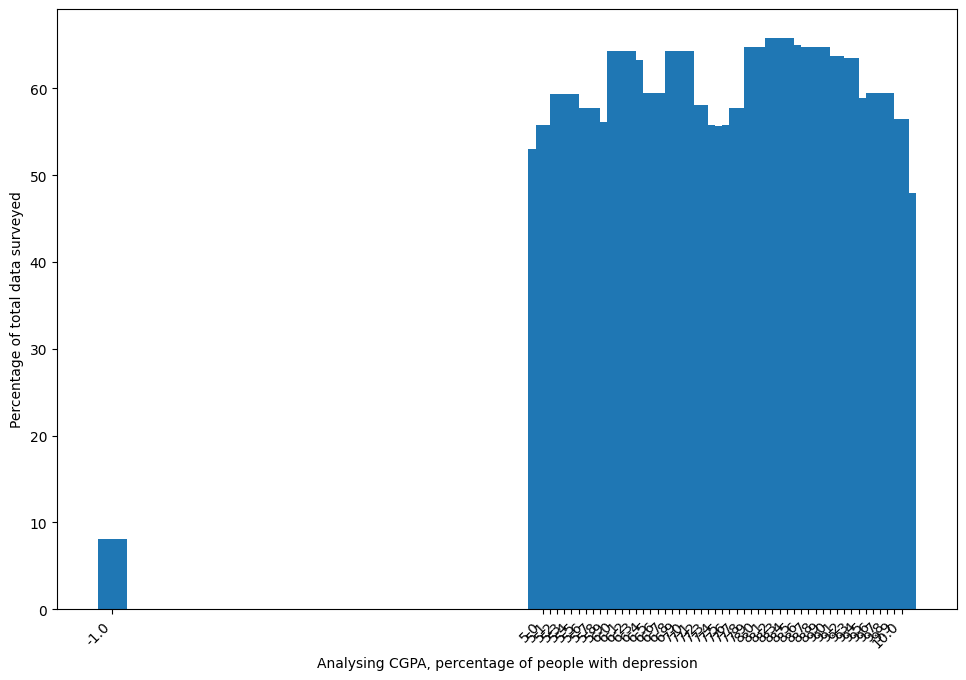

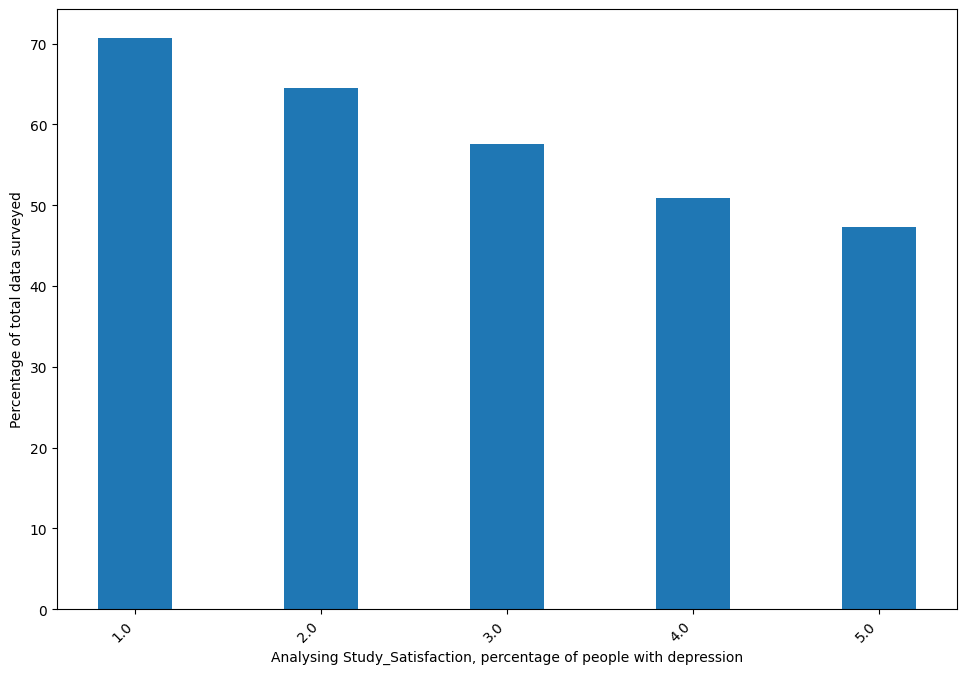

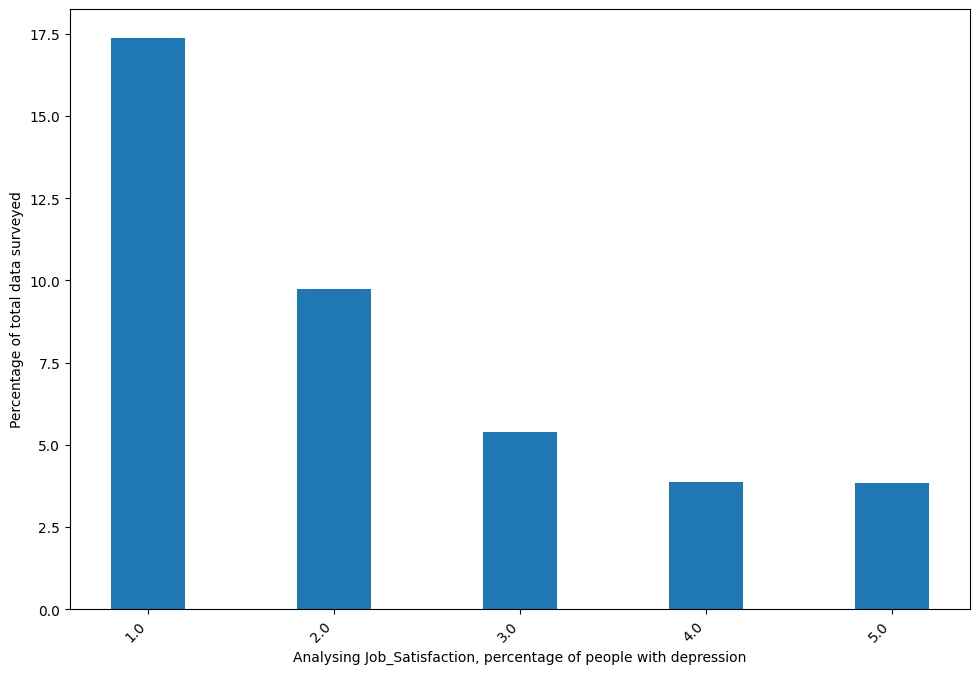

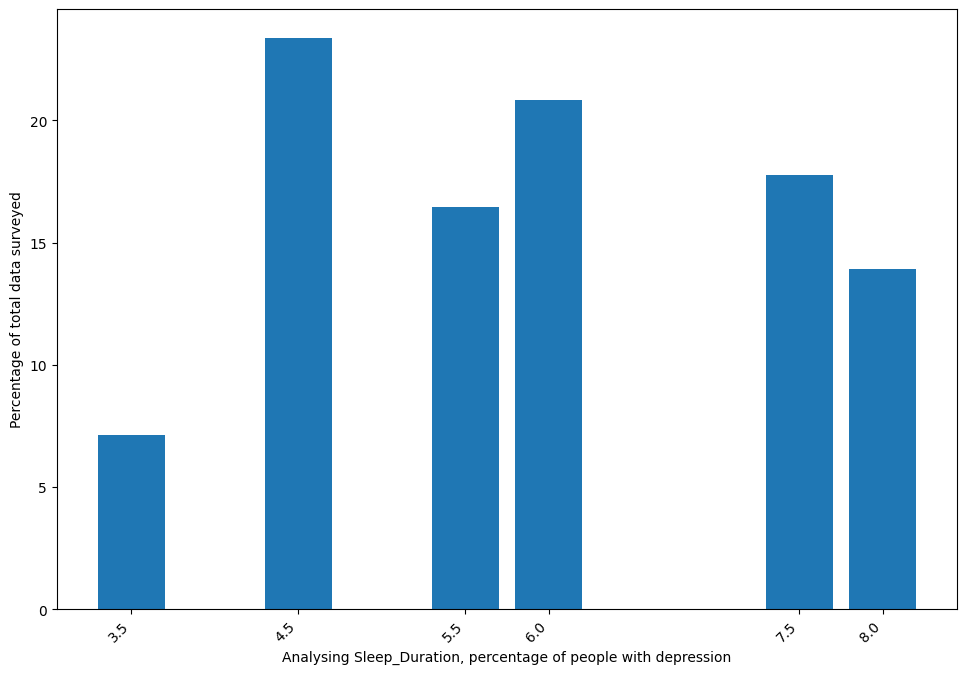

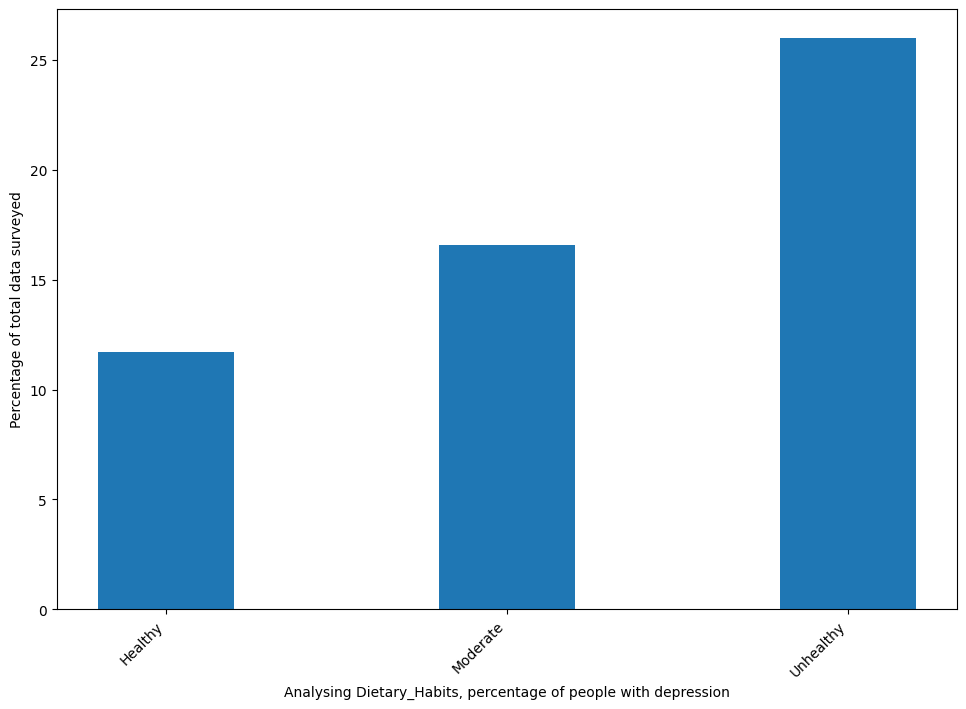

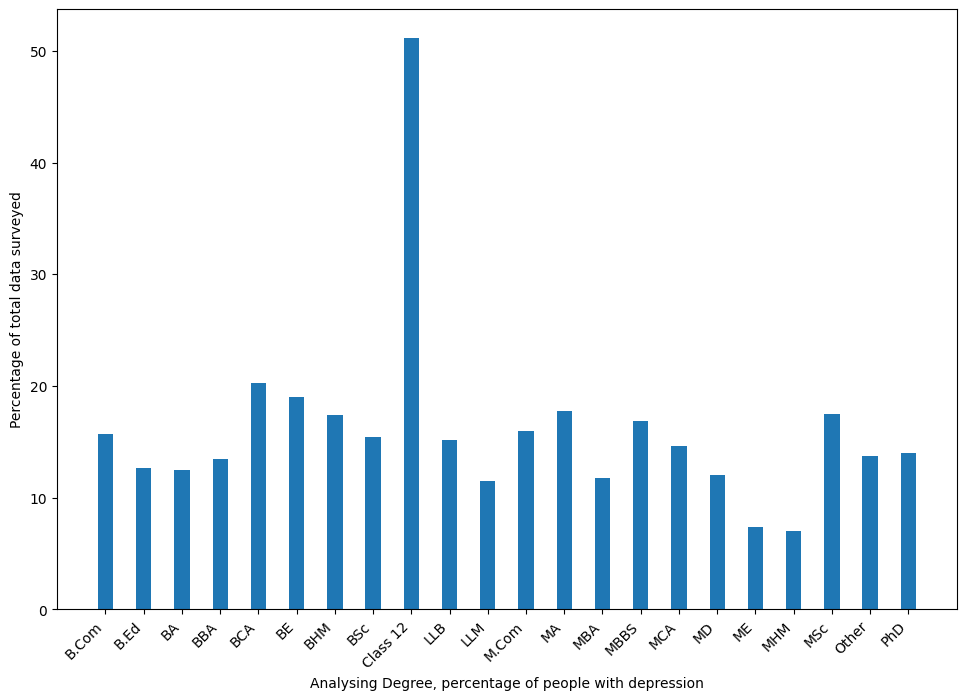

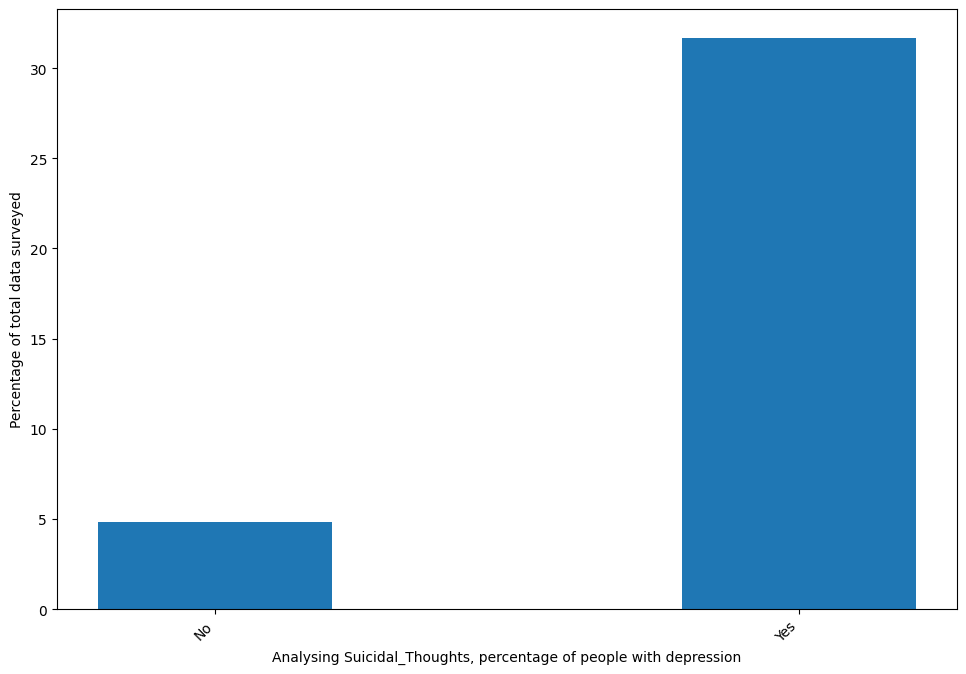

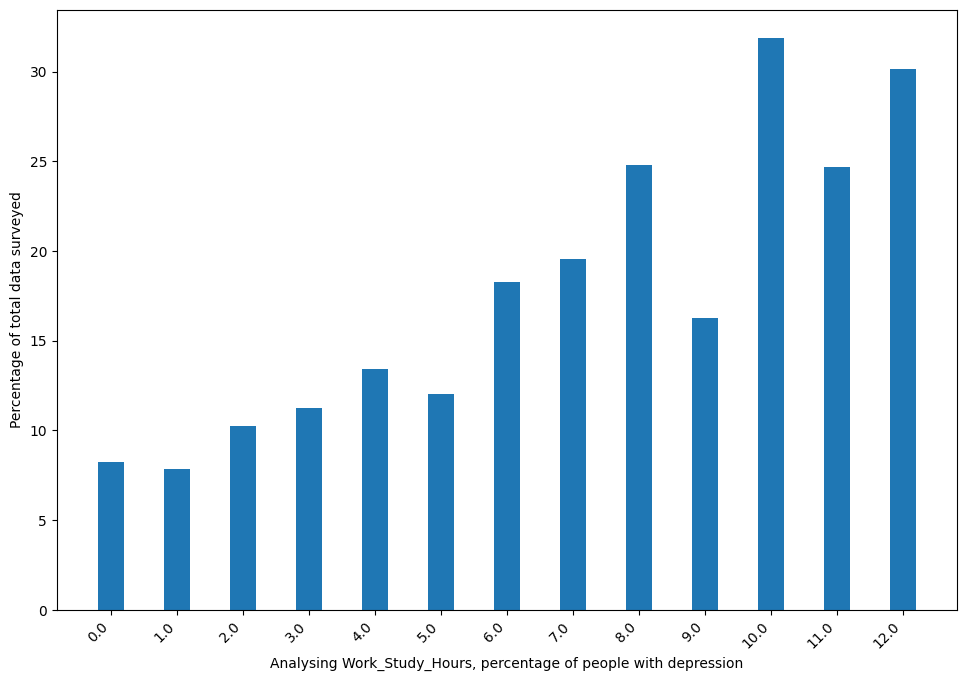

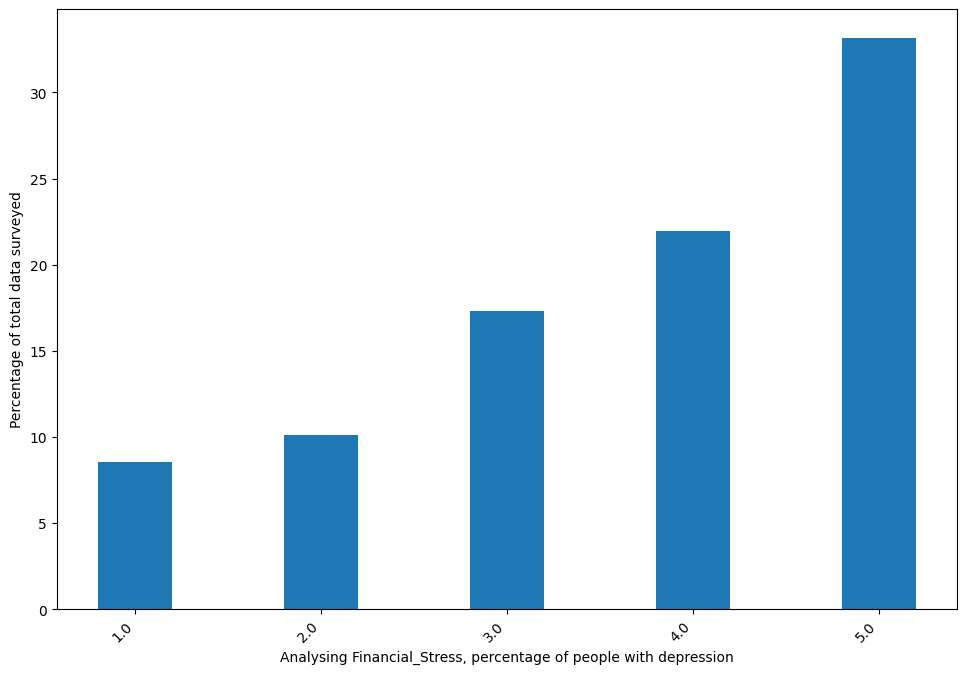

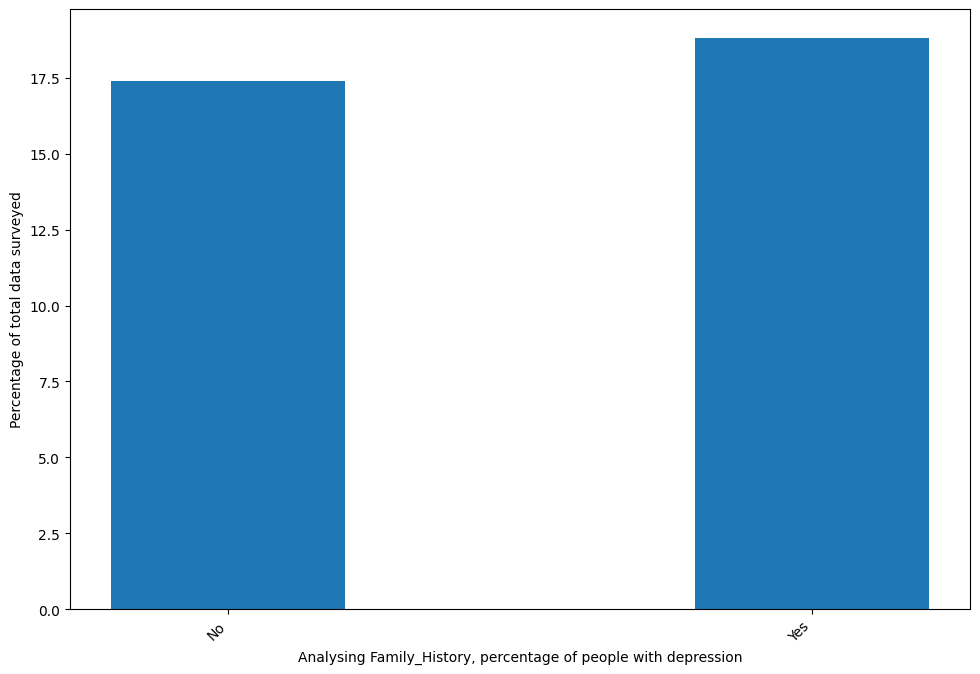

In [13]:
 
all_keys =  df.keys().to_list()

all_keys.remove('id')
all_keys.remove(TARGET)
# result['Gender']
# print(all_keys, result)


for key in all_keys:

    try :
            # result = df.groupby([key,TARGET]).value_count()
            figure = plt.figure(figsize=(10,8))
            axes = figure.add_axes([0.1,0.2,0.9, 0.75])
             
            axes.set_ylabel('Percentage of total data surveyed')
            axes.set_xlabel(f"Analysing {key}, percentage of people with depression")

            grouped_counts = df.groupby([key, TARGET])[TARGET].value_counts()
            df2 = grouped_counts.reset_index(name='Count')
            # print(df2)
            uq_list = df2[key].unique()
            # print(uq_list)
            names = []
            vals = []
            data_list = []
            dep_list = []
            for name in uq_list : 
               total = df2.loc[df2[key] == name, 'Count'].sum()
               if total < 10:
                    continue
               depressed = df2.loc[(df2[key] == name ) & (df2['Depression'] == "1"), 'Count'].sum() 
               names.append(name) 
               dep_list.append(depressed)
            
               perc =math.floor(depressed*10000/total)/100
               vals.append(perc)    
               data_list.append([name,perc,depressed,total])
               print(f"{key} for {name:10} has  {perc:>6}% {depressed:>8}, {total:>8}")
            # axes.plot(names,vals,)
            axes.bar(names, vals,0.4)
            axes.set_xticks(names)
            axes.set_xticklabels(names, rotation=45, ha='right')
            # axes.set_yticklabels(vals);
            rot = 0
            if (len(vals)> 6):
                 rot = 45
            # for i in range(0,len(vals)):
            #     axes.text(i,vals[i],f"{dep_list[i]}",ha="center", rotation=rot )
            target = f'../reports/v1/figures/{slugify(key)}.png'
            figure.savefig(target)
            print(f"Generated {target} chart")

            stats = pd.DataFrame(np.array(data_list),columns=[key,'Percentage','Depressed','Total'])
             
            # print(stats)
            stats.to_csv(f"../reports/v1/{slugify(key)}.csv")
            # if (key == 'City'):
                #  break
    except Exception as err:
        print("Error while",err)
    # break


    # plt.bar(depression_counts['Age'], depression_counts['Count'], color='skyblue')
 